提取评论热词，看看用户租房都注重什么

In [18]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [19]:
reviews=pd.read_csv('reviews.csv')
reviews=reviews[['reviewer_id','comments']]
reviews.head(2).append(reviews.tail(2))                            #查看数据前几行+后几行

,reviewer_id,comments
0,93896,"The flat was bright, comfortable and clean and..."
1,97890,We stayed with Adriano and Valerio for a week ...
1486234,97684167,This flat is perfection! Everything you need i...
1486235,52497809,You can expect to be staying is a very nice lo...


In [20]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486236 entries, 0 to 1486235
Data columns (total 2 columns):
reviewer_id    1486236 non-null int64
comments       1485614 non-null object
dtypes: int64(1), object(1)
memory usage: 22.7+ MB


In [21]:
comments = reviews['comments'][0:86236]  # 此处只取部分comments，因为全部取是在太大太大了，经常发生内存过载，可以分别取部分部分多次分析。

final = " ".join('%s'%review for review in comments)

## 利用NLTK进行分词

删除三个字母及以下组成的单词

In [22]:
from nltk.tokenize import word_tokenize

temp=word_tokenize(final)

In [23]:
a=[]
for i in temp:
    if (len(i)>3):
        a.append(i)

In [24]:
a[0:2000]

['flat',
 'bright',
 'comfortable',
 'clean',
 'Adriano',
 'pleasant',
 'gracious',
 'about',
 'accommodating',
 'last',
 'minute',
 'Brixton',
 'tube',
 'very',
 'short',
 'walk',
 'away',
 'there',
 'were',
 'plenty',
 'buses',
 'There',
 'lots',
 'fast',
 'food',
 'restaurants',
 'banks',
 'shops',
 'along',
 'main',
 'street',
 'stayed',
 'with',
 'Adriano',
 'Valerio',
 'week',
 'when',
 'first',
 'moving',
 'London',
 'apartment',
 'great',
 'very',
 'clean',
 'compared',
 'places',
 'seen',
 'London',
 'Situated',
 'very',
 'close',
 'Brixton',
 'tube',
 'good',
 'links',
 'central',
 'London',
 'Thanks',
 'guys',
 'perfect',
 'week',
 'chilton',
 'supernice',
 'flowers',
 'bouquets',
 'fresh',
 'croissants',
 'were',
 'waiting',
 'kitchen',
 'when',
 'arrived',
 'apartment',
 'sweet',
 'terrace',
 'just',
 'amazing',
 'location',
 'great',
 'internet',
 'really',
 'fast',
 'included',
 'kinds',
 'different',
 'stores',
 'around',
 'area',
 'tube',
 'station',
 'several',
 'stat

## 将分词合并

In [25]:
txt = " ".join('%s'%i for i in a)

In [26]:
#根据最原始数据得到的词云所展示的一些无用词汇，将其删除
drop=['London','house','flat','stay','They','Agri','Roger','really','well',
      'london','they','everything','city','great','lots','were','need','everyg','super','plenty','place','highly','good','easy',
     'Thank','apartment','nice','very','lovely','even','definitely','would','host','this','little','wonderful','made','will',
     'perfect','excellent','fantastic','loved']

for i in drop:
    txt=txt.replace(i,'')

In [27]:
text=word_tokenize(txt)
txt = " ".join('%s'%i for i in text)

In [28]:
f = open("处理过的评论词汇.txt", "w",encoding='utf-8')

s = str(txt)
f.write(s)

# 关闭打开的文件，必须关闭不然电脑能炸裂
f.close()

In [29]:
txt[0:500]

'bright comfortable clean Adriano pleasant gracious about accommodating last minute Brixton tube short walk away there buses There fast food restaurants banks shops along main street ed with Adriano Valerio week when first moving clean compared s seen Situated close Brixton tube links central s guys week chilton flowers bouquets fresh croissants waiting kitchen when arrived sweet terrace just amazing location internet fast included kinds different stores around area tube station several stations '

In [30]:
len(txt)

16699375

分层形成词图，这样不容易错过小信息

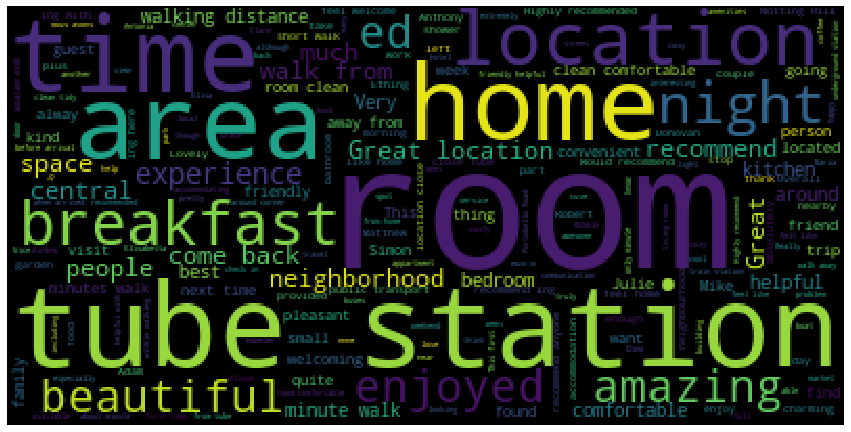

In [31]:
from wordcloud import WordCloud

word_pic = WordCloud().generate(txt[0:4000000])
fig = plt.figure(figsize=(15,9))
plt.imshow(word_pic)
#去掉坐标轴
plt.axis('off')
#保存图片到相应文件夹
plt.savefig(r'1.jpg',dpi=800)

关键词条： 房间、位置、面积、早餐

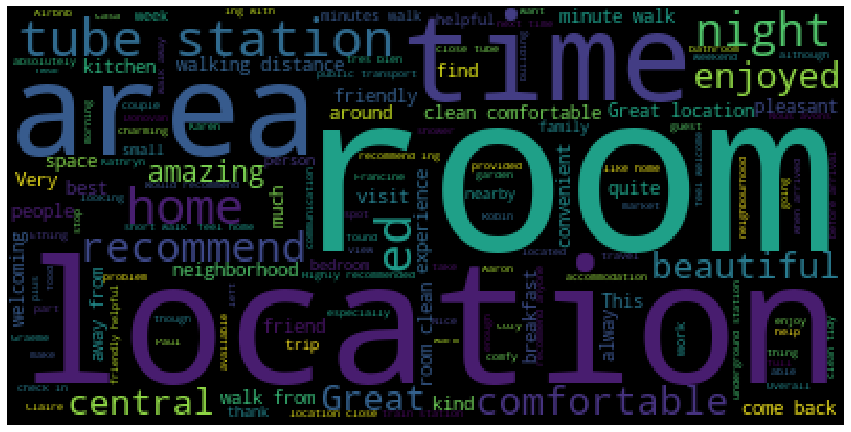

In [32]:
word_pic = WordCloud().generate(txt[4000000:8000000])
fig = plt.figure(figsize=(15,9))
plt.imshow(word_pic)
#去掉坐标轴
plt.axis('off')
#保存图片到相应文件夹
plt.savefig(r'2.jpg',dpi=800)

关键词条：时间、美丽、家、舒适、临近

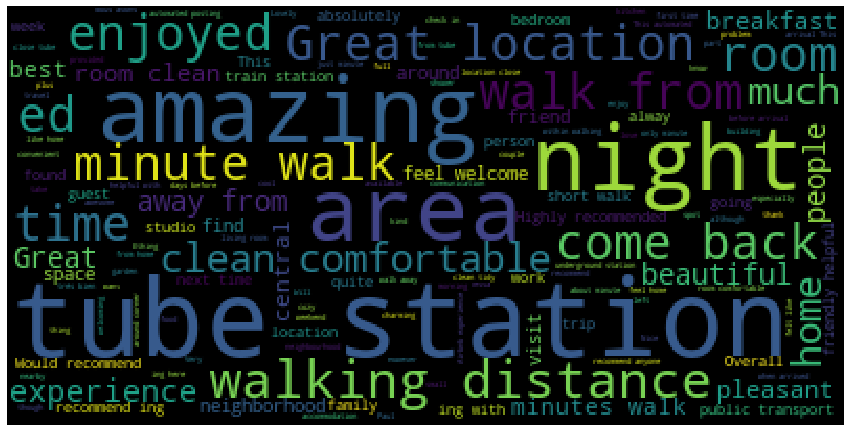

In [33]:
word_pic = WordCloud().generate(txt[8000000:120000000])
fig = plt.figure(figsize=(15,9))
plt.imshow(word_pic)
#去掉坐标轴
plt.axis('off')
#保存图片到相应文件夹
plt.savefig(r'3.jpg',dpi=800)

关键词条：地铁站、干净、步行距离、火车站

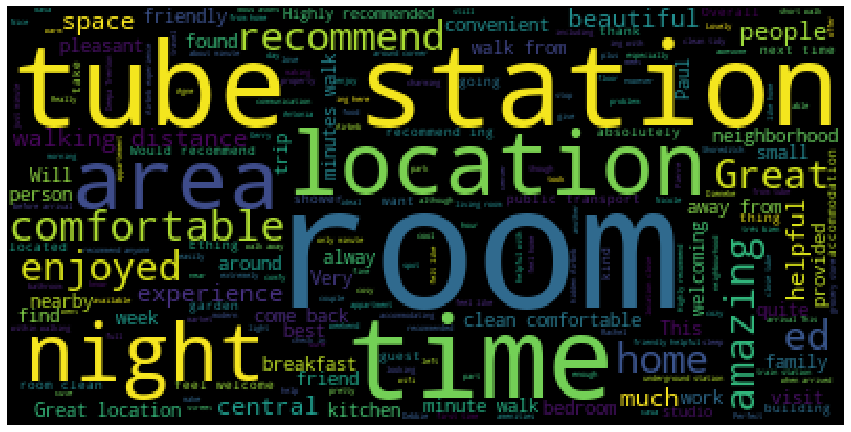

In [34]:
word_pic = WordCloud().generate(txt[12000000:])
fig = plt.figure(figsize=(15,9))
plt.imshow(word_pic)
#去掉坐标轴
plt.axis('off')
#保存图片到相应文件夹
plt.savefig(r'4.jpg',dpi=800)

关键词条：友好的、人、邻居、厨房

总结：根据文字大小，即词的频率我们不难发现。

人们最为注重：房间质量、位置（是否临近某某站）
其次关注：面积、卫生、早餐、舒适度、邻居、厨房等

这些其他均符合大众认知，不过,"早餐"容易被大众忽视，房东提供早餐或许可以提升房源的评分

此外，若继续细分，或许可以得到其他被大众忽略掉的有用的小信息